## Homework 1

Recall question 3 from last Thursday's in-class assignment. Given a positive integer $n$, you generated a sequence of integers that ended in 1.

1. If $n$ is an odd number, define the _depth_ of $n$ to be the number of odd numbers other than $1$ in this sequence. For example, since the sequence for $n=3$ is $[3, 10, 5, 16, 8, 4, 2, 1]$, the depth of $3$ is $2$. 

Using the code that you have to generate this sequence, make a NumPy array containing the depths of all odd numbers less than 10,000. Answer the following two questions: 
* What is the maximum depth among all such numbers?
* What proportion of such numbers have depth equal to 1?

Extra credit: plot the distribution of depths of odd numbers that are less than 10,000 (i.e., the plot shows, for each depth that comes up, the proportion of such numbers that have that depth). In a Markdown cell, tell me something that you notice about the distribution. 

In [126]:
import numpy as np
# https://stackoverflow.com/questions/1987694/how-do-i-print-the-full-numpy-array-without-truncation
import sys
np.set_printoptions(threshold=sys.maxsize)

def calculateSequence(sequence: list, n: int):
    if n == 1: 
        return sequence
    elif n % 2 == 0: 
        sequence.append(n // 2)
        return calculateSequence(sequence, n // 2)
    else: 
        sequence.append(3 * n + 1)
        return calculateSequence(sequence, 3 * n + 1)

def main(arr):
    for i in range(1, 10000, 2):
        sequence = calculateSequence([i], i)
        
        # Initially, this is what I programmed to calculate the depth of each sequence
        # depth = 0 
        # for val in sequence: 
        #     if val % 2 != 0 and val != 1: 
        #         depth += 1

        # But, when asking AI to optimize my code, it gave me this simplified expression using a list comprehension
        depth = sum(1 for val in sequence if val % 2 != 0 and val != 1)
        
        arr.append(depth)
    return arr

if __name__ == "__main__":
    arr = []
    main(arr)
    arr = np.array(arr)
    print(arr)


[ 0  2  1  5  6  4  2  5  3  6  1  4  7 41  5 39  8  3  6 11 40  9  4 38
  7  7  2 41 10 10  5 39  8  8  3 37 42  3  6 11  6 40  1  9  9 33  4 38
 43  7  7 31 12 36 41 24  2 10  5 10 34 15 39 15 44  8  8 13 32 13  3 37
 42 42  6  3 11 30 11 18 35  6 40 23 16 45  9 28  9  9  4 33 14 14 38 14
 43 43  7 43  4 12  7 31 12 12  2 36  7 17 41 24 17  2 10 46 29 46 10 17
  5 34  5 15 15 22 39 15 44 44  8 27 44  5  8 13  8 32  3 13 13 20 37 13
  8 42 42 18 25 42  3 13 11 11  6 30 47 11 11 18  6 35  6 52 16  6 40 23
 40 16  1 45 45 45  9 28 45  9  9 16 14 14 33 14  4 14  4 14 21 19 38 14
  9 43 43 43 19 26  7 43  4  4  7 12 12 48 31 48 48 12 12  9 19 17 36 12
  7  7 41 17  7 17 24 34 41 17  2 12 46 46 10 46 10 29  5 46 10  7 10 17
 15  5 34 51 15 51 15 34  5 15 39 22 20 10 15 20 10 44 44 20 44 44  8 27
  8 44  8  5  5 15 13 49 13  8 32 13 49  8 13 30 13 13  3 20 18  8 37 13
  8  8 42  8 18 42 42 18 25 25  6 42 18 23  3 13 47 11 11 23 47 47 30 47
  6 47 11 11  8  8 18 47 16  6 35 11 52 35  6 52 16

---

2. Write a custom Python function. The function should take an array of $x$ values as its argument and it returns a set of $y$ values "with noise" for the chi-squared function $y = \frac{1}{4}x e^{-x/2}$. The noise should be put in by adding to $y$ a value of a mean-zero, normally distributed random variable with a small standard deviation (something close to $1/100$, say). After defining your custom function in your session, produce a plot of the chi-squared function on the interval $[0,5]$, together with a scatter plot of 200 noisy $(x,y)$ pairs.
> Generate the $x$-coordinates of the noisy pairs with a uniform distribution.

In [215]:
# TODO
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('darkgrid')

In [159]:
xx = np.random.uniform(0, 5, size=200)
yy = (1/4) * xx * np.exp(-(xx)/2)
noisy_yy = yy + np.random.normal(loc=0,scale=0.05,size=200)

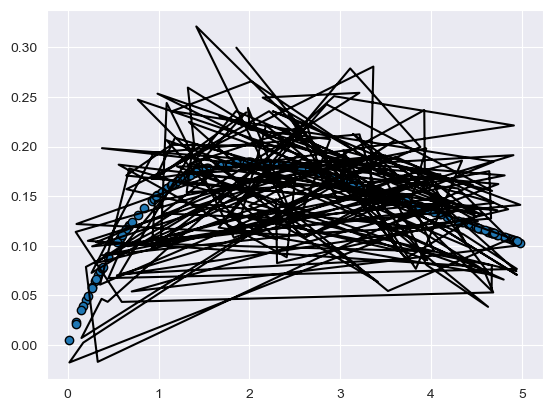

In [172]:
plt.plot(xx, noisy_yy, color='black')
plt.scatter(xx, yy, edgecolors='black')
plt.show()

---

For question 3, we will import a data set. The data set is the data on automobiles available in the DataSets folder. Download that file and put it in the same folder where you are running this notebook. (Or, if you know how, use the `%cd` magic command to be able to access the directory the data set is in.) The name of the file should be `Auto.csv`.

We'll briefly use a DataFrame to import the data, but just in order to extract two NumPy arrays from it. To do this, do the following in this notebook. 

* First, import the Pandas package using the command `import pandas`.
* Second, set a variable equal to `pandas.read_csv('Auto.csv')`.
* If the variable used in the last bullet was `my_dataframe`, make two arrays as follows: 
```python 
mpg = my_dataframe['mpg'].to_numpy()
weight = my_dataframe['weight'].to_numpy()
```

The automobile for index `i` has weight `weight[i]` (in lbs.) and gets `mpg[i]` miles-per-gallon.

3. After creating the arrays `mpg` and `weight` as above, use NumPy to do linear regression (find the line of "best fit") on the data `(weight, mpg)`. Plot the data and the line together.

In [183]:
import pandas as pd
df = pd.read_csv('Auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [187]:
weight = df['weight'].to_numpy()
mpg = df['mpg'].to_numpy()

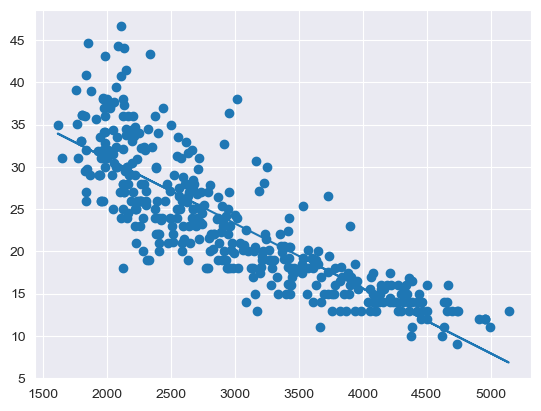

In [213]:
# Reference: https://www.statology.org/line-of-best-fit-python/

# line of best fit
a, b = np.polyfit(weight, mpg, 1)

# data points
plt.scatter(weight, mpg)

plt.plot(weight, a*weight+b)